In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.3.0


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95
az.rcParams["plot.density_kind"] = "hist"
rng = np.random.default_rng(seed=42)


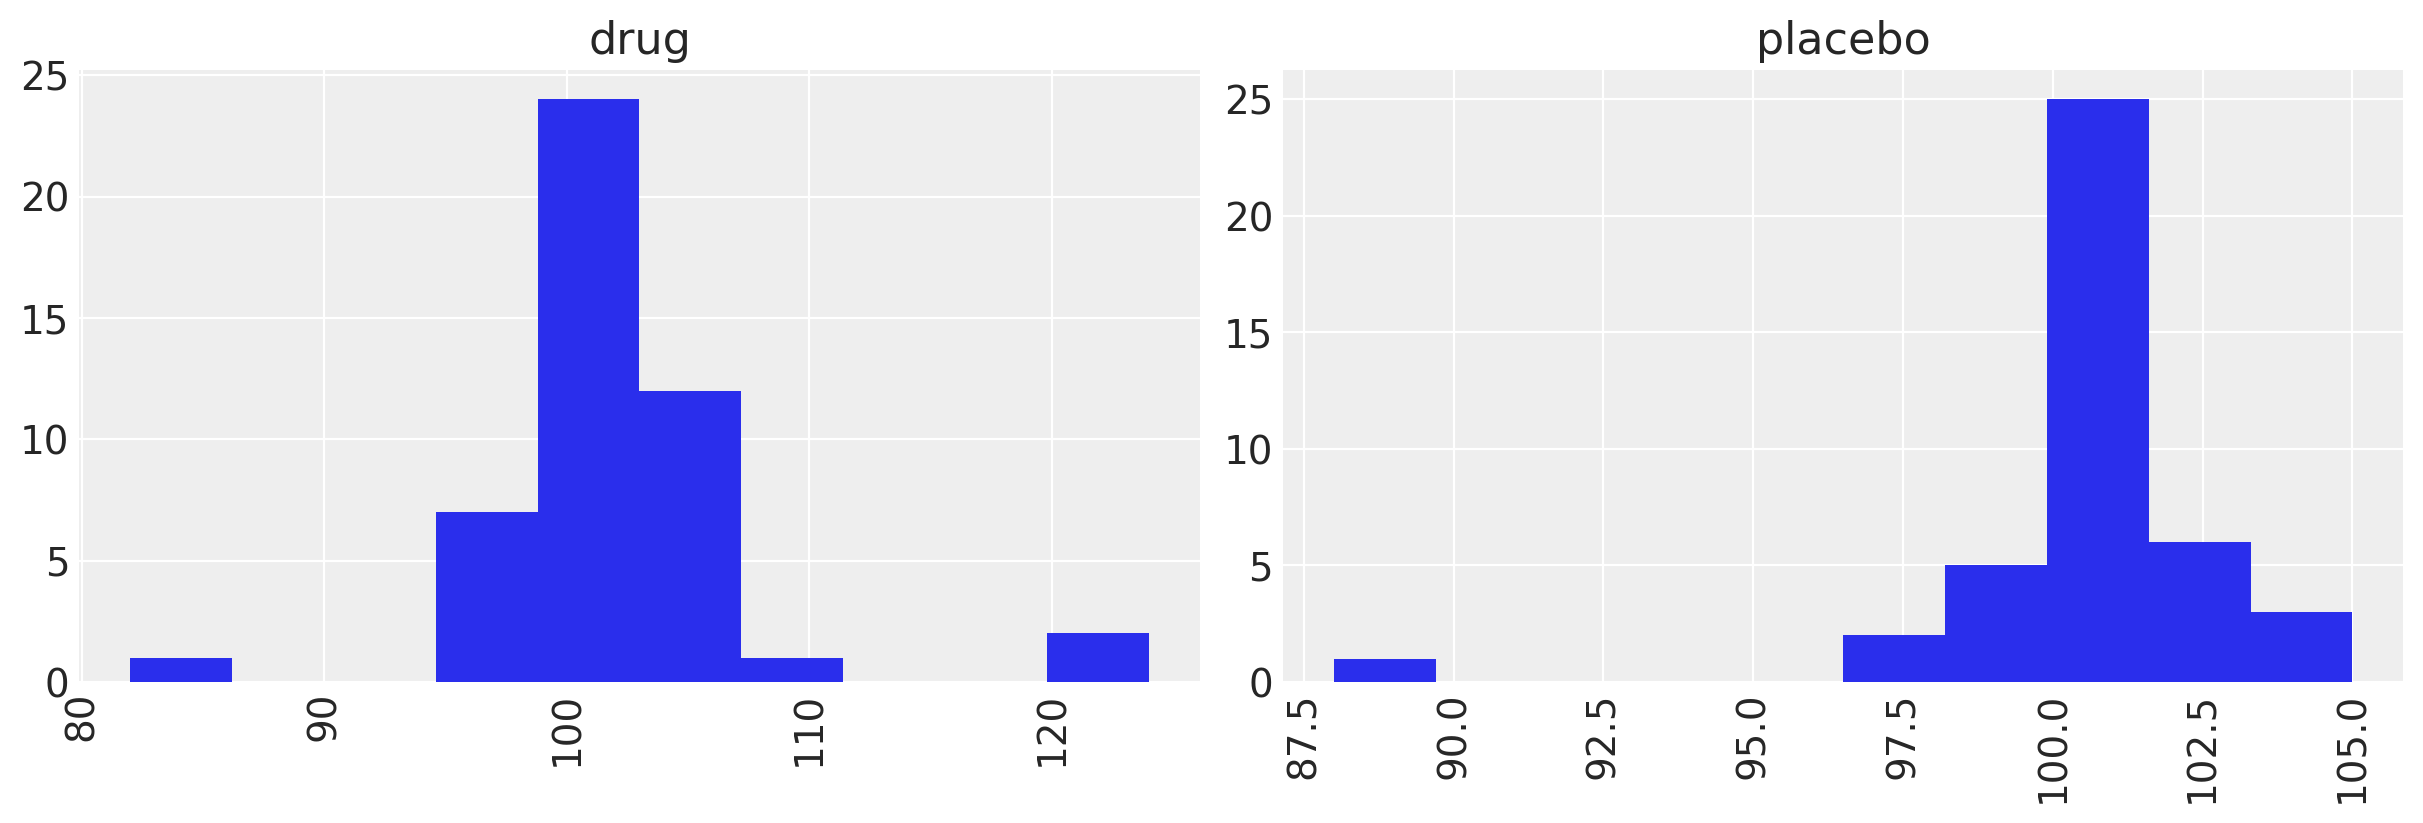

In [3]:
# Using data from pymc3 port of Kruschke's BEST model (see: 
# https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html)
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

In [4]:
# Call your Bayesian function from the toolbox
# model, idata = bst.BEST(y["value"], y["group"], 2000)
model, idata = bst.BEST_copy(y["value"], y["group"], 2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group_mean, group_std, nu_minus_one]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.


In [5]:
# Print out a summary of results
az.summary(idata)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group_mean[0],101.561,0.375,100.814,102.291,0.005,0.003,6122.0,5023.0,1.0
group_mean[1],100.531,0.212,100.122,100.943,0.002,0.002,7546.0,5459.0,1.0
group_std[0],2.056,0.439,1.273,2.969,0.005,0.004,6341.0,5370.0,1.0
group_std[1],1.049,0.205,0.661,1.450,0.003,0.002,5524.0,4053.0,1.0
nu_minus_one,0.837,0.486,0.012,1.753,0.006,0.004,5203.0,4048.0,1.0
nu,1.837,0.486,1.012,2.753,0.006,0.004,5203.0,4048.0,1.0
nu_log10,0.250,0.109,0.050,0.473,0.001,0.001,5203.0,4048.0,1.0
difference of means,1.030,0.429,0.200,1.903,0.005,0.004,6523.0,5189.0,1.0
difference of stds,1.007,0.442,0.198,1.905,0.005,0.003,8306.0,6667.0,1.0
effect size,0.651,0.293,0.074,1.235,0.004,0.003,6781.0,5032.0,1.0


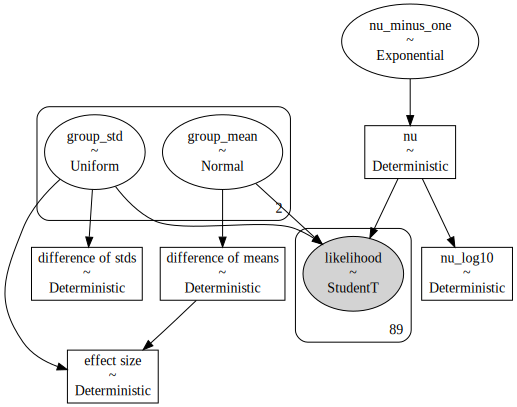

In [7]:
pm.model_to_graphviz(model)

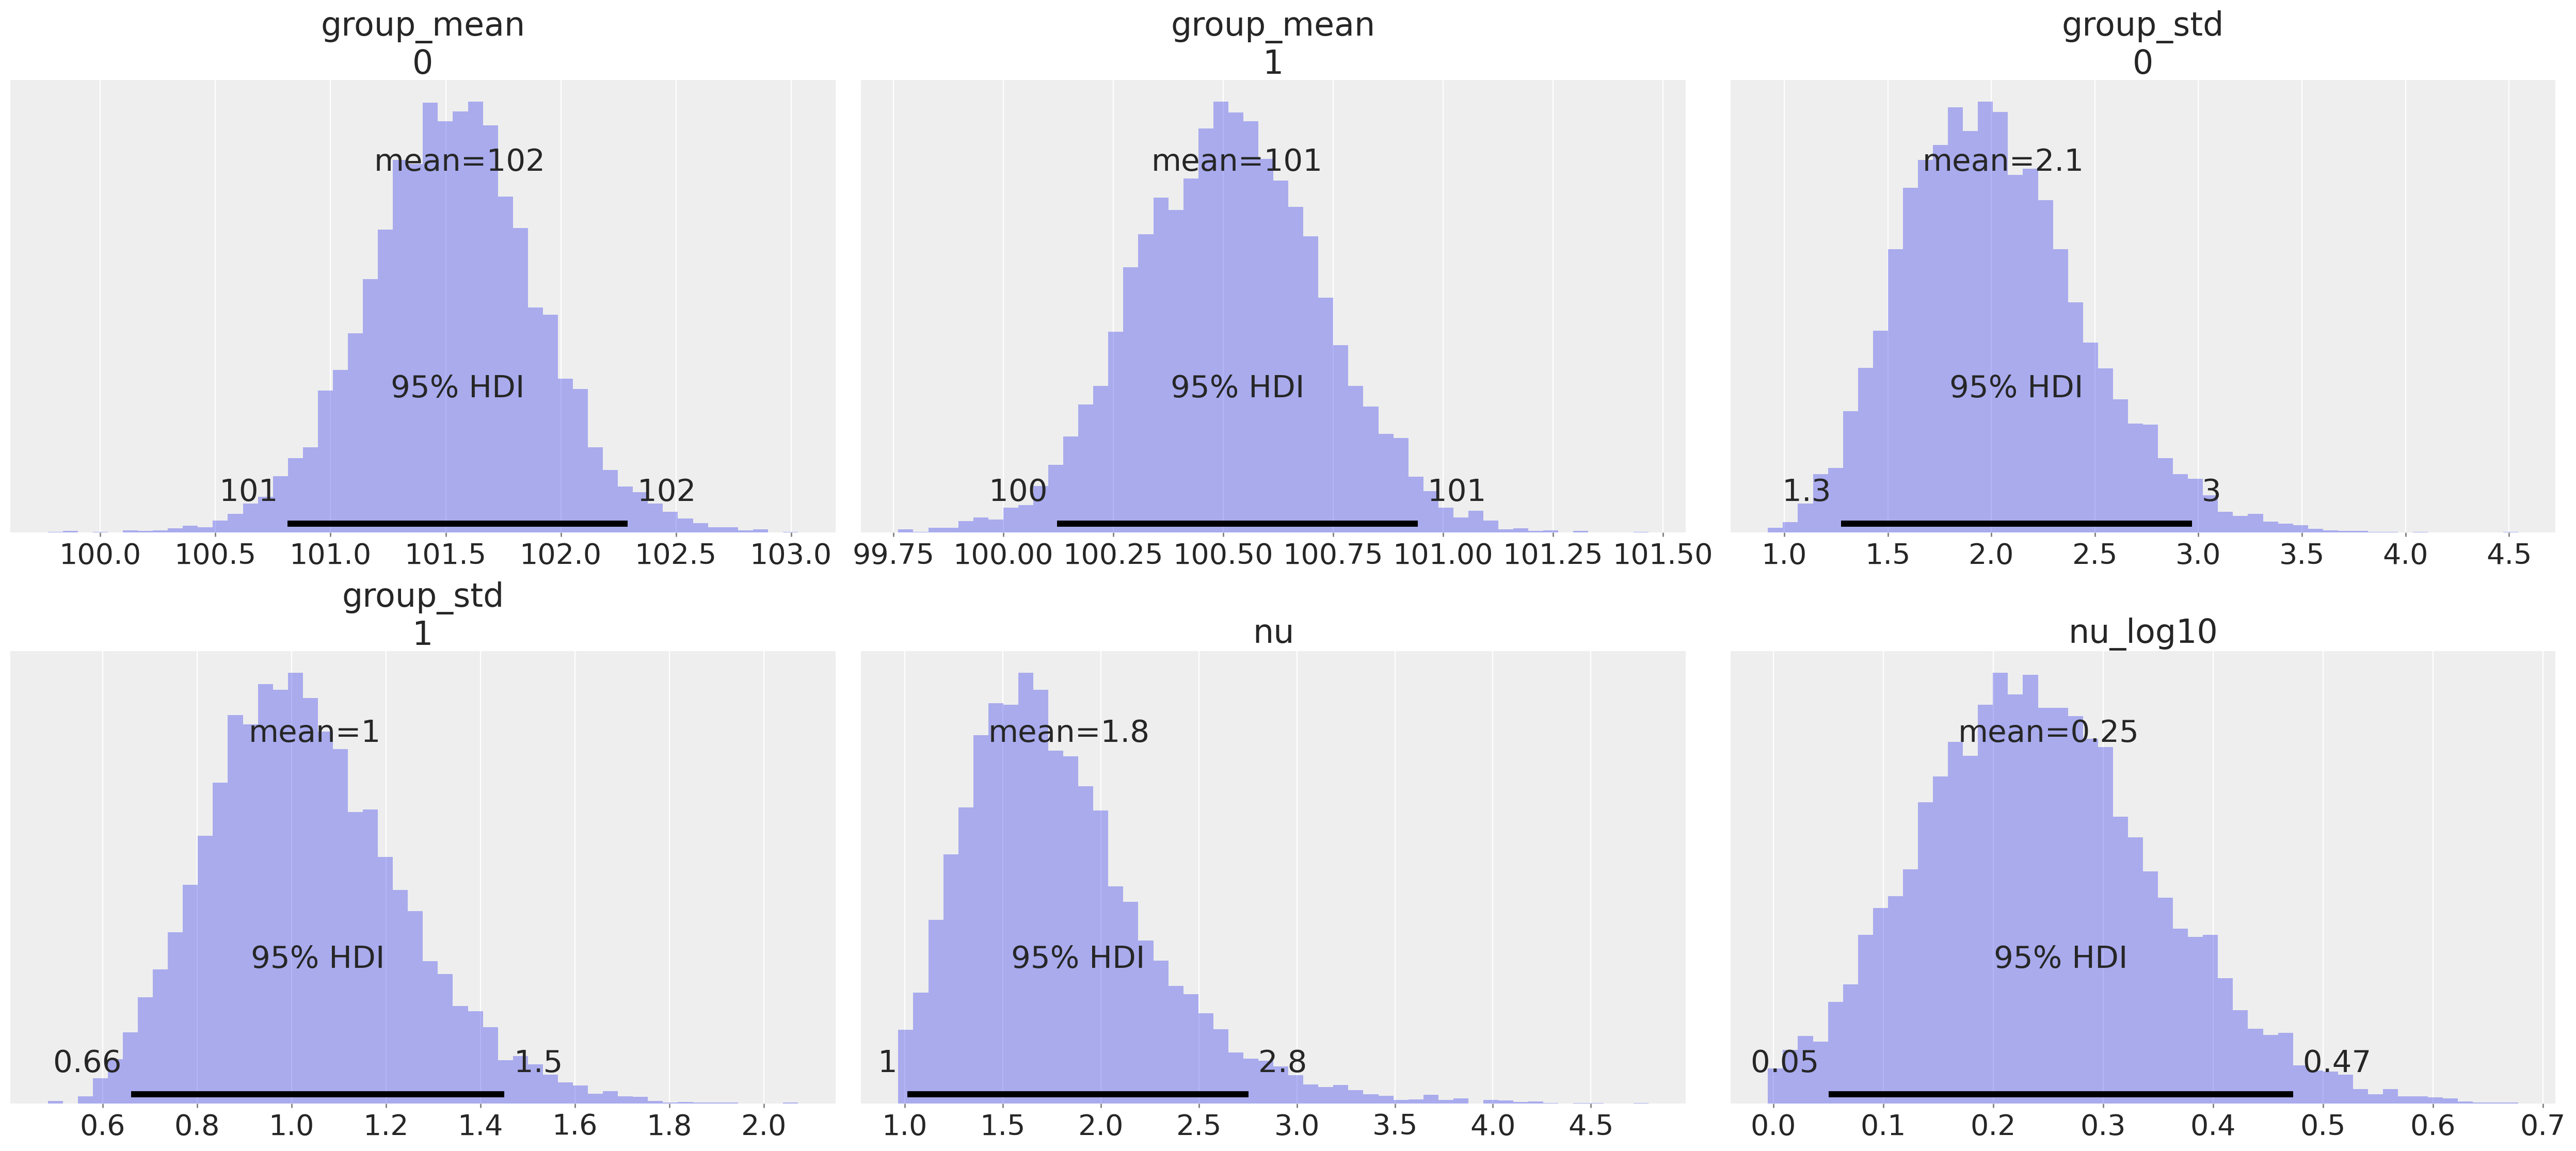

In [8]:
# Plot posterior
# az.plot_posterior(
#     idata,
#     var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "nu", "nu_log10"],
#     bins=50,
#     textsize=20
# );
az.plot_posterior(
    idata,
    var_names=["group_mean", "group_std",  "nu", "nu_log10"],
    bins=50,
    textsize=20
);

In [9]:
# idata_posterior = idata.posterior


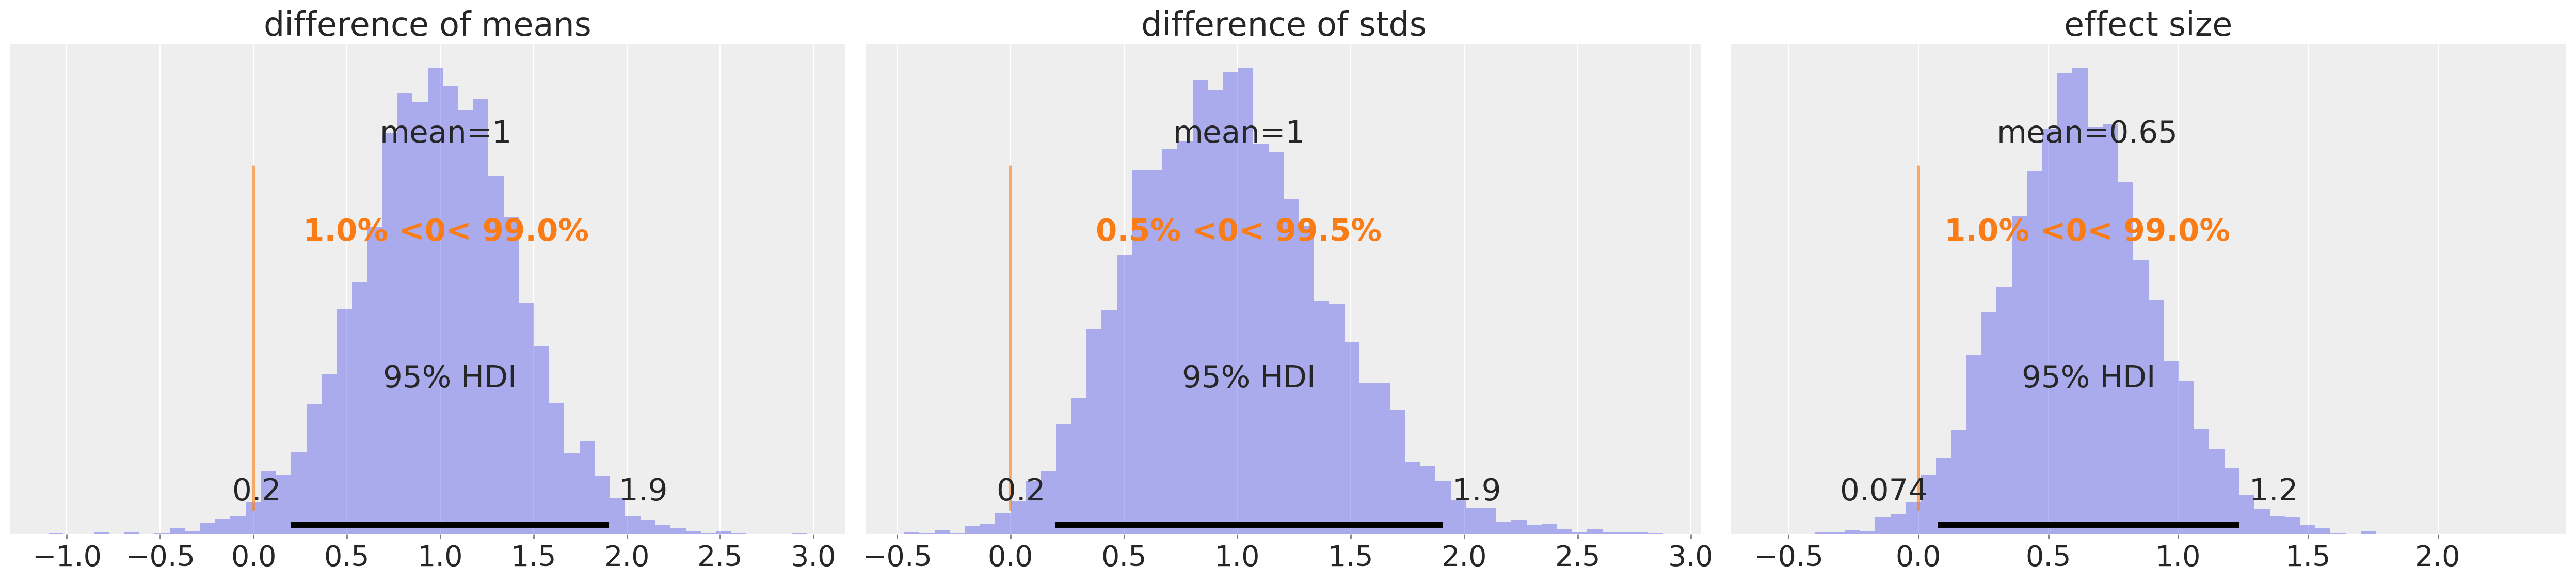

In [10]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    bins=50,
    textsize=20
);

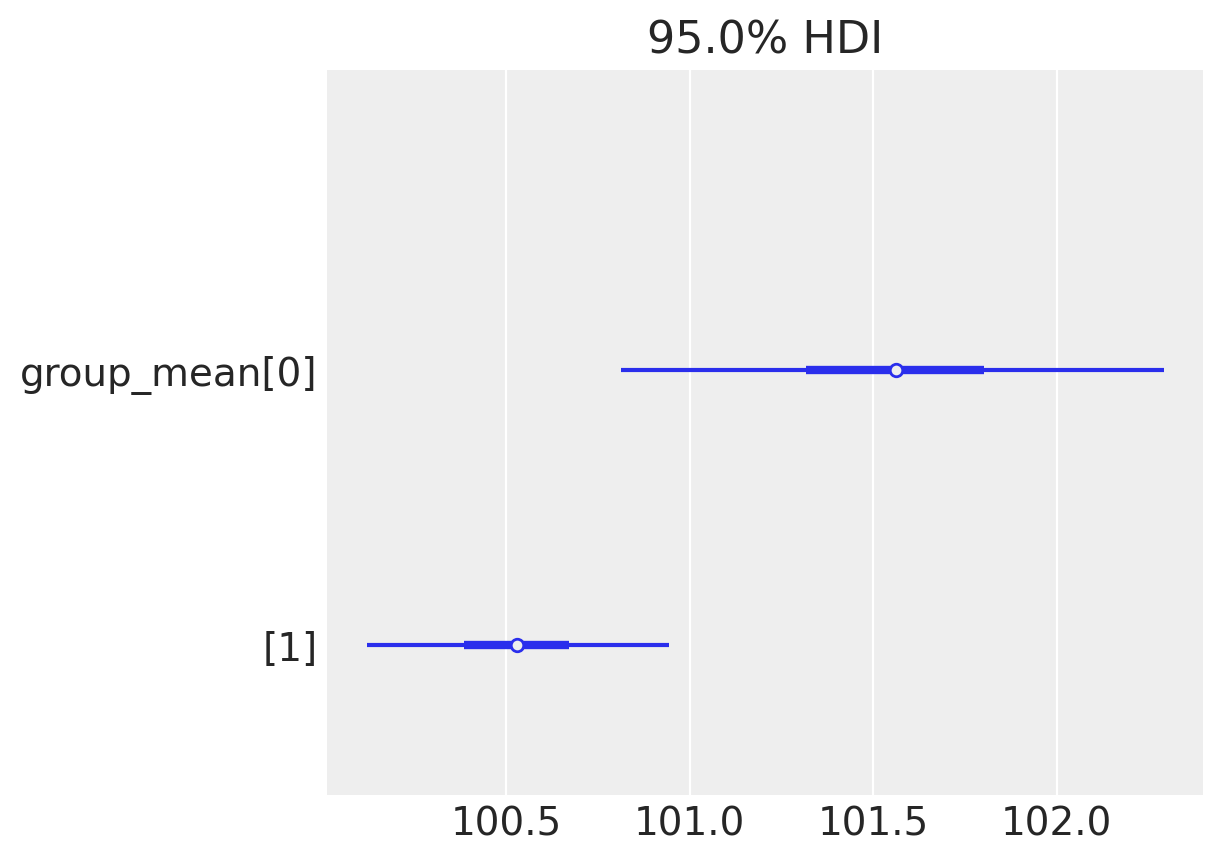

In [11]:
# Plot parameter estimates
#az.plot_forest(idata, var_names=["group1_mean", "group2_mean"], combined=True);
az.plot_forest(idata, var_names=["group_mean"], combined=True);

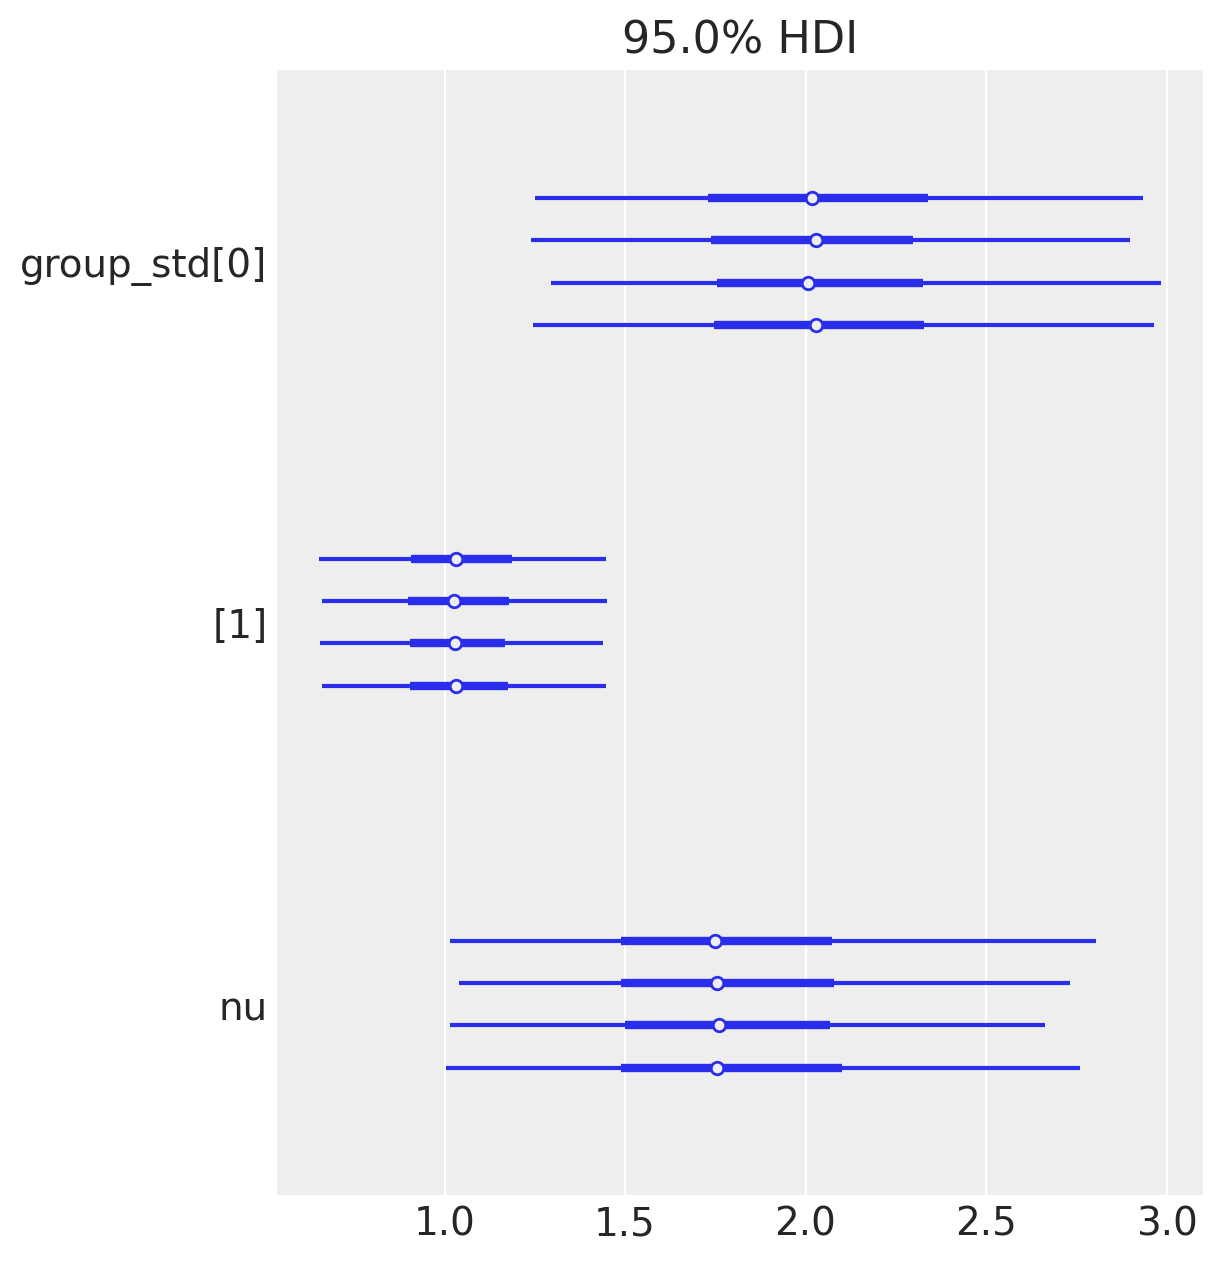

In [12]:
# Plot parameter estimates
#az.plot_forest(idata, var_names=["group1_std", "group2_std", "nu"]);
az.plot_forest(idata, var_names=["group_std", "nu"]);

In [13]:
# If you want to print the model so that you edit, simply add two question marks after the function name.
bst.BEST_copy??

Signature: bst.BEST_copy(y, group, n_draws=1000)
Source:   
def BEST_copy(y, group, n_draws=1000):
    """Implementation of John Kruschke's BEST test.
    
    Compares outcomes from two groups and estimates parameters. This version
    uses smarter indexing than original. 
    
    Args:
        y (ndarray/Series): The metric outcome variable.
        group: The grouping variable providing that indexes into y.
        n_draws: Number of random samples to draw from the posterior.
    
    Returns: 
        PyMC Model and InferenceData objects.
    """
    
    # Convert grouping variable to categorical dtype if it is not already
    if pd.api.types.is_categorical_dtype(group):
        pass
    else:
        group = group.astype('category')
    group_idx = group.cat.codes.values
        
    # Extract group levels and make sure there are only two
    level = group.cat.categories
    assert len(level) == 2, f"Expected two groups but got {len(level)}."
    
    # Calculate pooled empirica

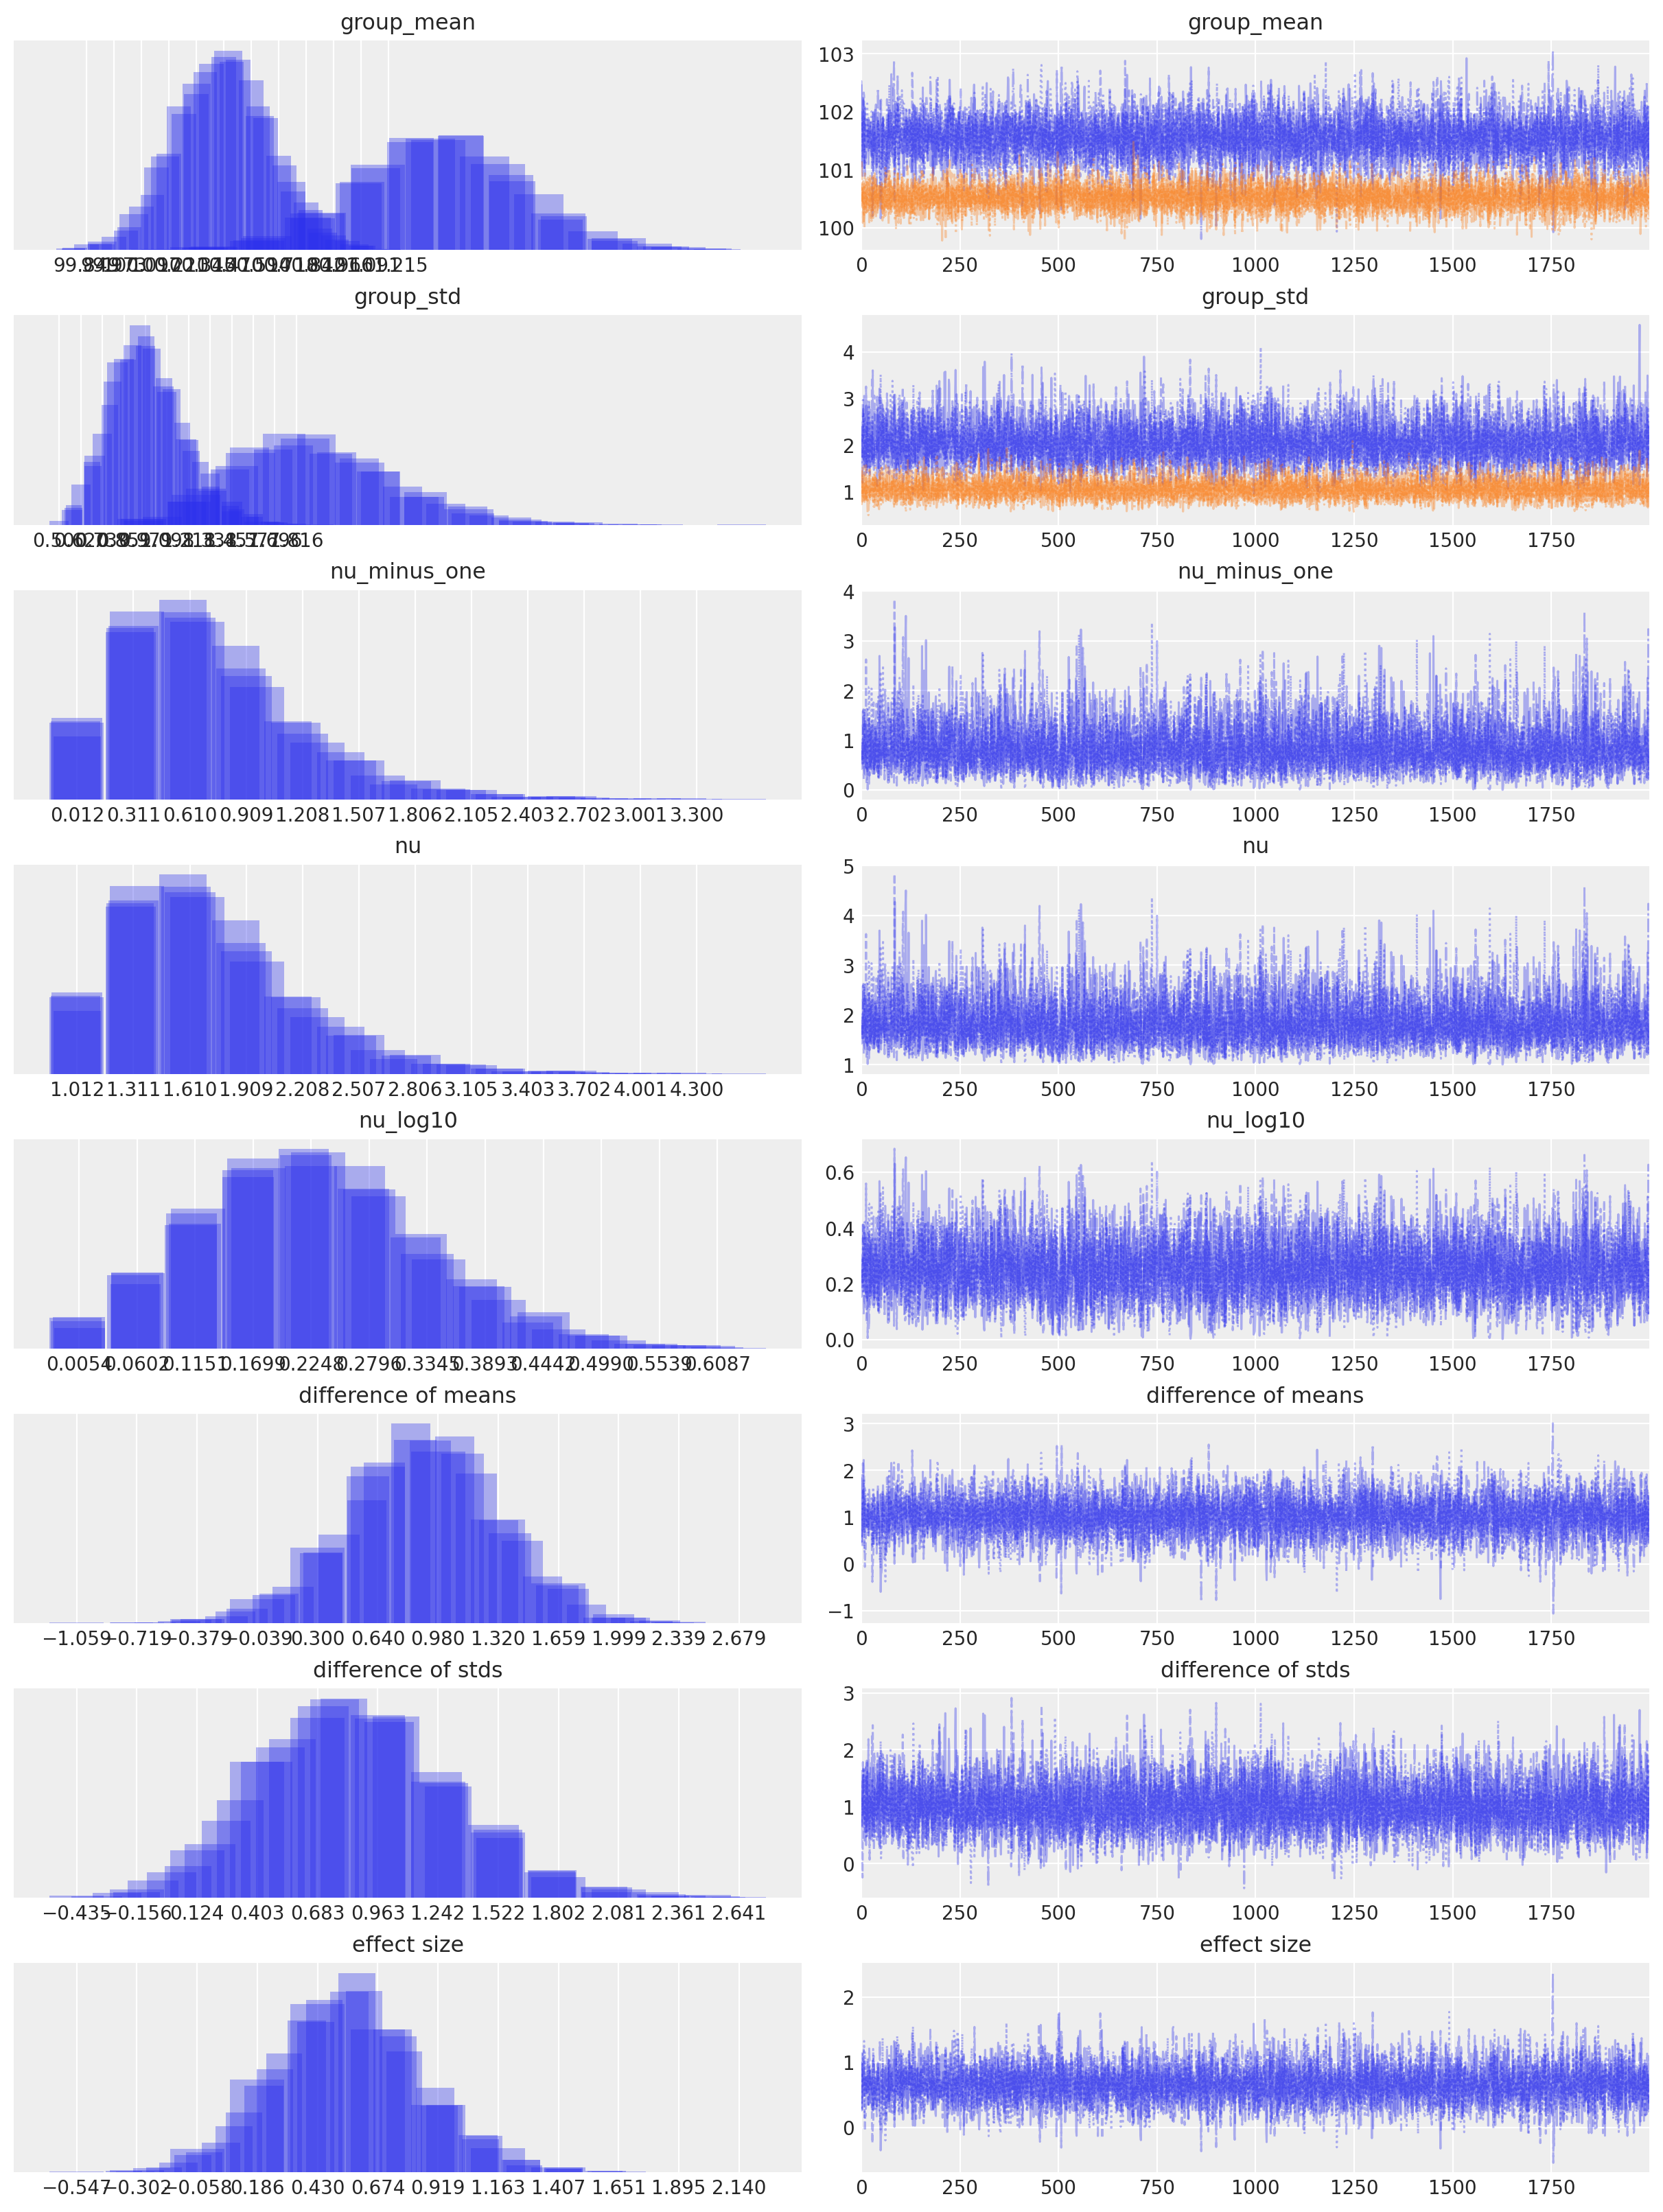

In [14]:
# Assess your MCMC chains.
az.plot_trace(idata);

In [15]:
# Posterior predictive check
with model:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [likelihood]


In [19]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

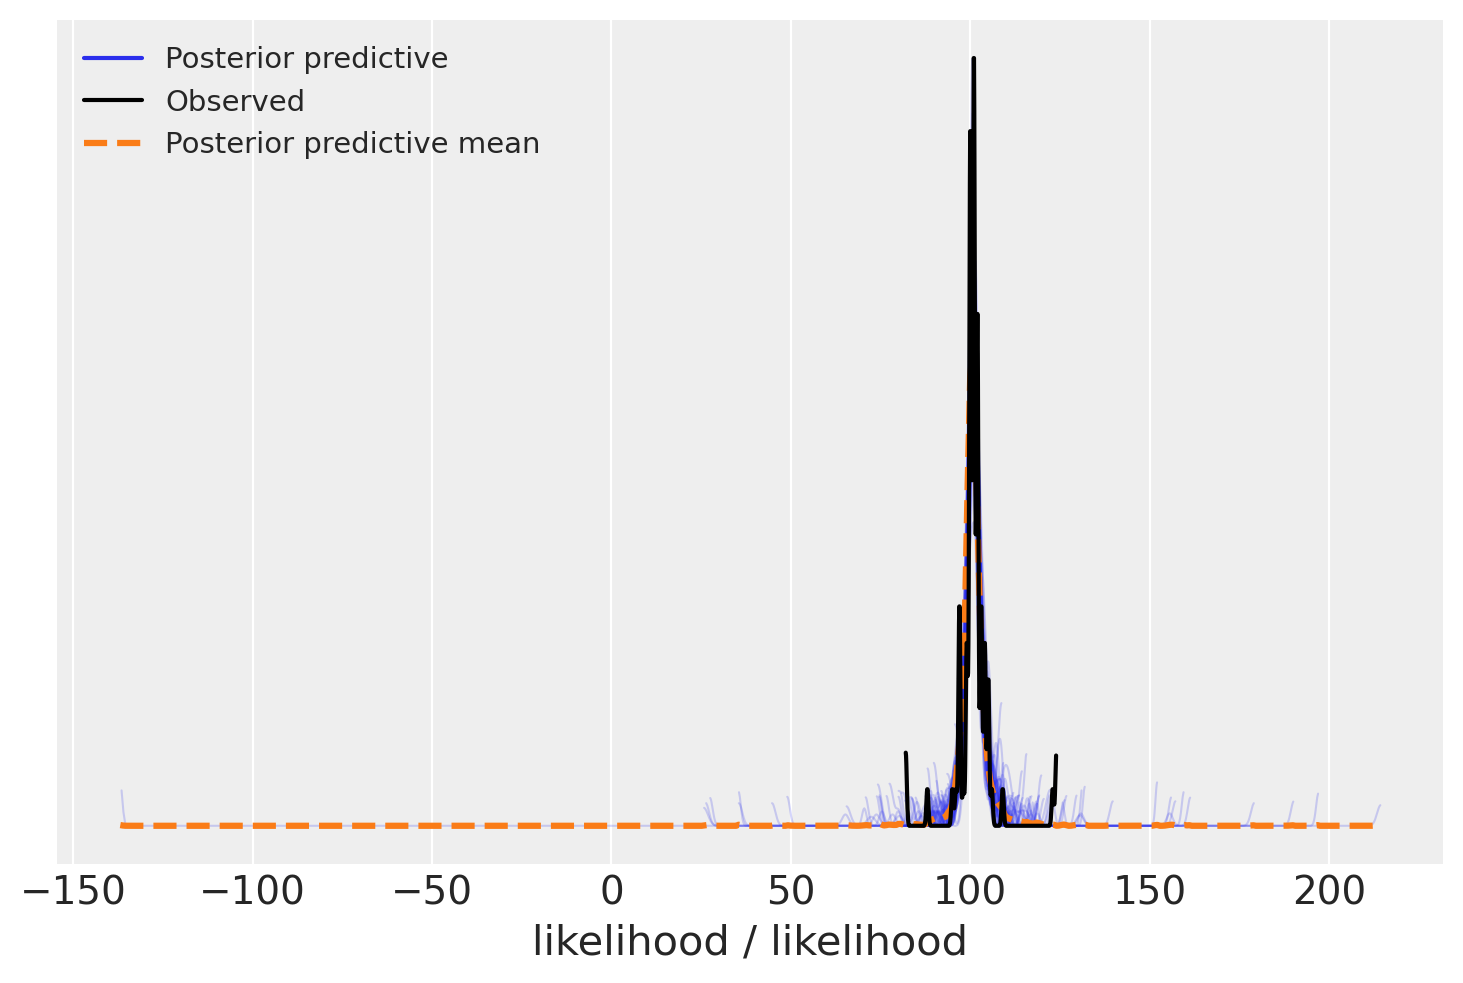

In [21]:
az.plot_ppc(idata, num_pp_samples=50);

In [22]:
az.rcParams.keys()

KeysView(RcParams({'data.http_protocol': 'https',
          'data.index_origin': 0,
          'data.load': 'lazy',
          'data.log_likelihood': True,
          'data.metagroups': {'latent_vars': ('posterior', 'prior'),
                              'observed_vars': ('posterior_predictive',
                                                'observed_data',
                                                'prior_predictive'),
                              'posterior_groups': ('posterior',
                                                   'posterior_predictive',
                                                   'sample_stats',
                                                   'log_likelihood'),
                              'posterior_groups_warmup': ('_warmup_posterior',
                                                          '_warmup_posterior_predictive',
                                                          '_warmup_sample_stats'),
                              'prior_groups

In [23]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
    